In [4]:
import re
import unicodedata
import pandas as pd
import nltk

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

# Spam Data

In [5]:
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
df = pd.read_csv('./spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
ham_frequency = pd.Series(ham_words).value_counts()

In [20]:
spam_words = clean(' '.join(df[df.label == 'spam'].text))
spam_frequency = pd.Series(ham_words).value_counts()

In [27]:
ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                   .value_counts()
                   .head(20))

In [93]:
ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

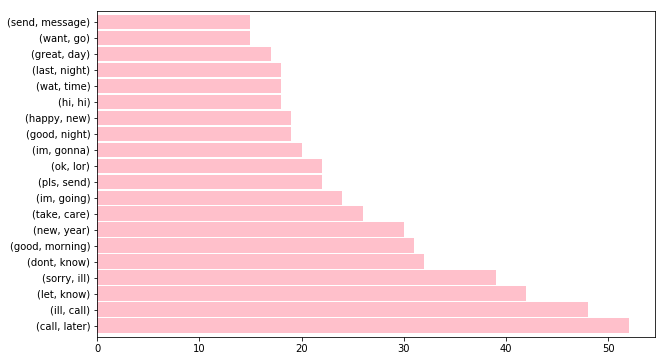

In [96]:
ham_bigrams.plot.barh(width=.9, figsize=(10,6), color='pink')

In [29]:
spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                    .value_counts()
                    .head(20))

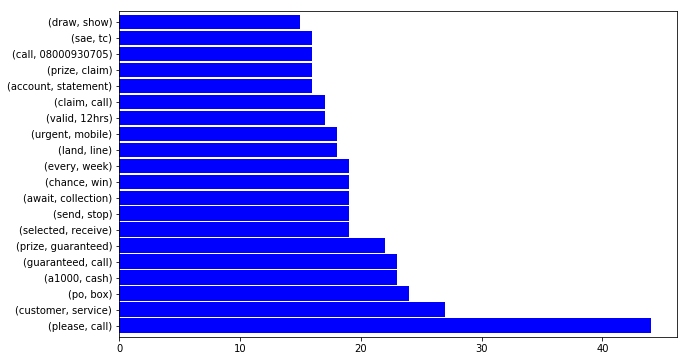

In [99]:
spam_bigrams.plot.barh(width=.9, figsize=(10,6), color='blue')

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

(-0.5, 799.5, 399.5, -0.5)

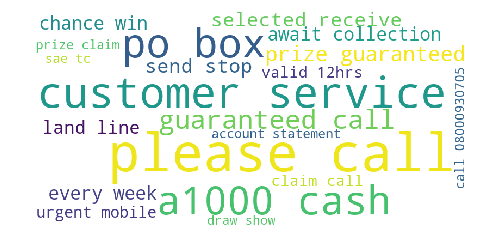

In [35]:
from wordcloud import WordCloud

data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

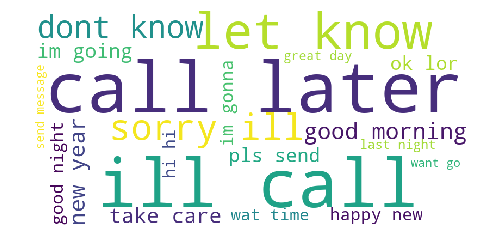

In [36]:
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')

In [54]:
bigram_counts = pd.concat([spam_bigrams, ham_bigrams], sort=True, axis=1)
bigram_counts.columns = ['spam_bigram', 'ham_bigram']
bigram_counts.fillna(0)

spam_bigram  ham_bigram
a1000      cash                23.0         0.0
account    statement           16.0         0.0
await      collection          19.0         0.0
call       08000930705         16.0         0.0
           later                0.0        52.0
chance     win                 19.0         0.0
claim      call                17.0         0.0
customer   service             27.0         0.0
dont       know                 0.0        32.0
draw       show                15.0         0.0
every      week                19.0         0.0
good       morning              0.0        31.0
           night                0.0        19.0
great      day                  0.0        17.0
guaranteed call                23.0         0.0
happy      new                  0.0        19.0
hi         hi                   0.0        18.0
ill        call                 0.0        48.0
im         going                0.0        24.0
           gonna                0.0        20.0
land       line                18.0         0.0
last       night                0.0        18.0
let        know                 0.0        42.0
new        year                 0.0        30.0
ok         lor                  0.0        22.0
please     call                44.0         0.0
pls        send                 0.0        22.0
po         box                 24.0         0.0
prize      claim               16.0         0.0
           guaranteed          22.0         0.0
sae        tc                  16.0         0.0
selected   receive             19.0         0.0
send       message              0.0        15.0
           stop                19.0         0.0
sorry      ill                  0.0        39.0
take       care                 0.0        26.0
urgent     mobile              18.0         0.0
valid      12hrs               17.0         0.0
want       go                   0.0        15.0
wat        time                 0.0        18.0

In [85]:
ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                    .value_counts()
                    .head(30))

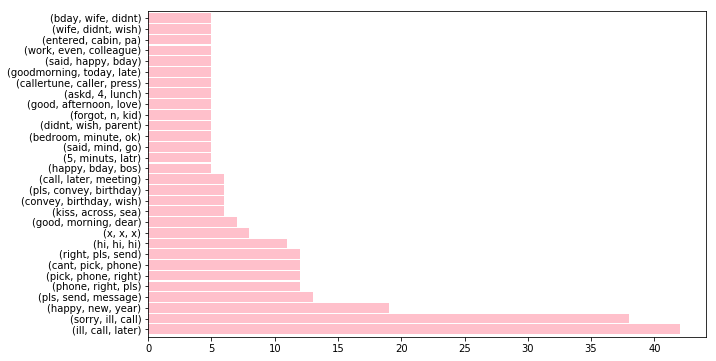

In [97]:
ham_trigrams.plot.barh(color='pink', width=.9, figsize=(10, 6))

In [87]:
spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                    .value_counts()
                    .head(30))

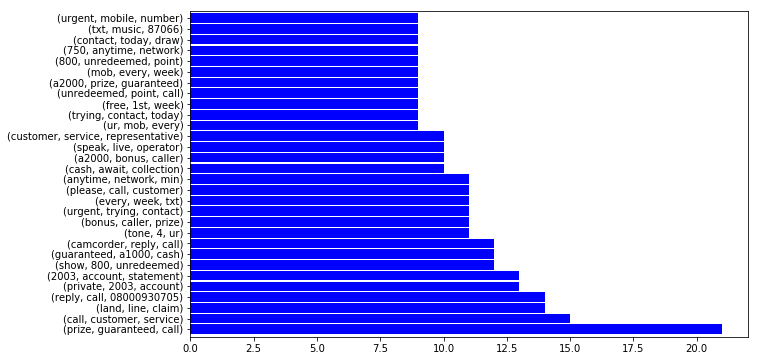

In [98]:
spam_trigrams.plot.barh(color='blue', width=.9, figsize=(10,6))

(-0.5, 799.5, 399.5, -0.5)

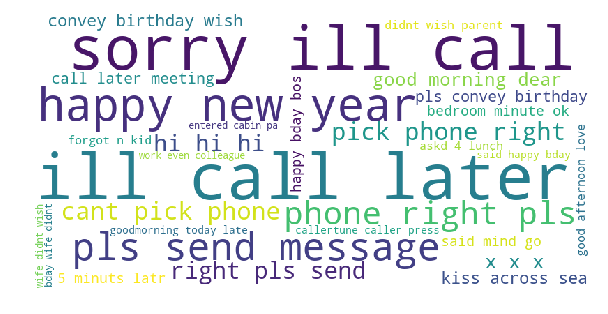

In [89]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in ham_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

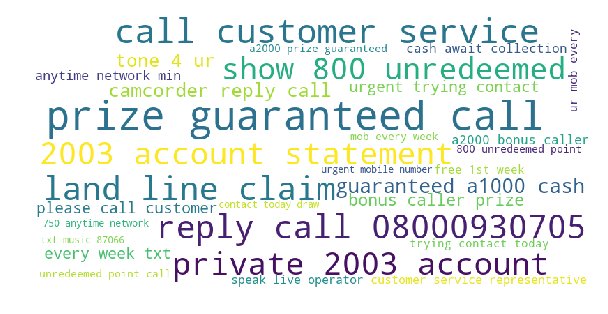

In [125]:
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_trigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')

# Blog Articles Data

In [134]:
from acquire import get_blog_articles
from acquire import get_news_articles
from prepare import prepare_article_data

In [135]:
data = prepare_article_data(get_blog_articles())

In [136]:
blog = pd.DataFrame.from_dict(data)
blog

,clean,content,lemmatized,original,stemmed,title
0,rumors true time arrived codeup officially ope...,The rumors are true! The time has arrived. Cod...,the rumor be true the time have arrive codeup ...,The rumors are true! The time has arrived. Cod...,the rumor are true the time ha arriv codeup ha...,codeups-data-science-career-accelerator-is-here
1,dimitri antoniou maggie giust data science big...,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoniou and maggie giust \n datum ...,By Dimitri Antoniou and Maggie Giust\nData Sci...,by dimitri antoni and maggi giust data scienc ...,data-science-myths
2,dimitri antoniou week ago codeup launched imme...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoniou \n a week ago codeup launc...,"By Dimitri Antoniou\nA week ago, Codeup launch...",by dimitri antoni a week ago codeup launch our...,data-science-vs-data-analytics-whats-the-diffe...
3,10 tips crush sa tech job fair sa tech job fai...,10 Tips to Crush It at the SA Tech Job Fair\nS...,10 tip to crush at the sa tech job fair \n sa ...,10 Tips to Crush It at the SA Tech Job Fair\nS...,10 tip to crush it at the sa tech job fair sa ...,10-tips-to-crush-it-at-the-sa-tech-job-fair
4,competitor bootcamps closing model danger prog...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp be close be the model in d...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamp are close is the model in ...,competitor-bootcamps-are-closing-is-the-model-...


In [140]:
data = prepare_article_data(get_news_articles())

In [141]:
news = pd.DataFrame.from_dict(data)
news

,category,clean,content,lemmatized,original,stemmed,title
0,business,world ' fourthrichest person warren buffett cl...,After world's fourth-richest person Warren Buf...,after world fourthrich person warren buffett c...,After world's fourth-richest person Warren Buf...,after world' fourthrichest person warren buffe...,4th richest man Buffett says Tesla can't sell ...
1,business,gujaratbased diamond trader savji dholakia ' k...,"Gujarat-based diamond trader Savji Dholakia, w...",gujaratbase diamond trader savji dholakia who ...,"Gujarat-based diamond trader Savji Dholakia, w...",gujaratbas diamond trader savji dholakia who' ...,"Guj trader, who gifted cars to staff, to remov..."
2,business,world ' fourthrichest person warren buffett sa...,"World's fourth-richest person, Warren Buffett,...",world fourthrich person warren buffett have sa...,"World's fourth-richest person, Warren Buffett,...",world' fourthrichest person warren buffett ha ...,I'll never hesitate to fly on 737 MAX: Buffett...
3,business,us commerce secretary wilbur ross monday said ...,US Commerce Secretary Wilbur Ross on Monday sa...,commerce secretary wilbur ross on monday say ...,US Commerce Secretary Wilbur Ross on Monday sa...,us commerc secretari wilbur ross on monday sai...,We can't ensure cheaper oil sales to India aft...
4,business,proxy advisory firm ingovern alleged britannia...,Proxy advisory firm InGovern has alleged that ...,proxy advisory firm ingovern have allege that ...,Proxy advisory firm InGovern has alleged that ...,proxi advisori firm ingovern ha alleg that bri...,Britannia broke rules by not reporting Wadia's...
5,business,japanese billionaire yusaku maezawa chosen spa...,"Japanese billionaire Yusaku Maezawa, who was c...",japanese billionaire yusaku maezawa who be cho...,"Japanese billionaire Yusaku Maezawa, who was c...",japanes billionair yusaku maezawa who wa chose...,SpaceX's billionaire moon tourist says has no ...
6,business,air india ' new york office transferred 300000...,"Air India's New York office transferred $300,0...",air india new york office transfer 300000 2 cr...,"Air India's New York office transferred $300,0...",air india' new york offic transfer 300000 2 cr...,"AI sent ₹2cr to Nigeria instead of US firm, ai..."
7,business,indigo talks airbus add new planes including l...,IndiGo is in talks with Airbus to add new plan...,indigo be in talk with airbus to add new plane...,IndiGo is in talks with Airbus to add new plan...,indigo is in talk with airbu to add new plane ...,IndiGo talking to Airbus to buy yet-to-be-rele...
8,business,activists hyderabad claimed infosys deducting ...,Activists in Hyderabad have claimed that Infos...,activist in hyderabad have claim that infosys ...,Activists in Hyderabad have claimed that Infos...,activist in hyderabad have claim that infosi d...,"Infosys makes Hyd staff pay for parking, activ..."
9,business,apple featured world ' fourthrichest person be...,Apple has featured the world's fourth-richest ...,apple have feature the world fourthrich person...,Apple has featured the world's fourth-richest ...,appl ha featur the world' fourthrichest person...,Apple features Warren Buffett in its 1st game ...


# First Blog on the Codeup correculum

In [195]:
blog_words = blog.loc[:,"clean"][0]
blog_words

'rumors true time arrived codeup officially opened applications new data science career accelerator 25 seats available immersive program one kind san antonio help land job glassdoors 1 best job america data science method providing actionable intelligence data data revolution hit san antonio resulting explosion data scientist positions across companies like usaa accenture booz allen hamilton heb weve even seen utsa invest 70 cybersecurity center school data science built program specifically meet growing demands industry program 18 weeks long fulltime handson projectbased curriculum development instruction led senior data scientist maggie giust worked heb capital group rackspace along input dozens practitioners hiring partners students work real data sets realistic problems entire data science pipeline collection deployment receive professional development training resume writing interviewing continuing education prepare smooth transition workforce focus applied data science immediate 

In [167]:
blog_frequency = pd.Series(blog_words.split()).value_counts(ascending=False).head(20)

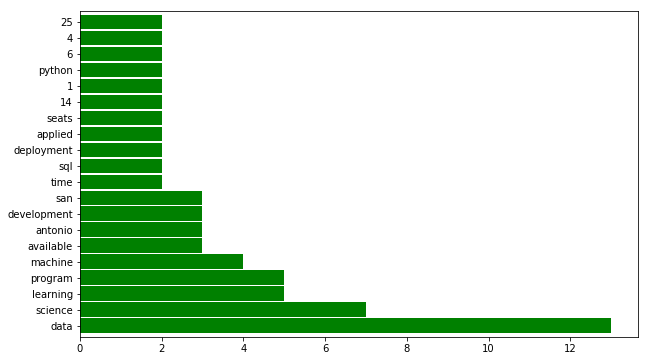

In [168]:
blog_frequency.plot.barh(width=.9, color='green', figsize=(10,6))

(-0.5, 399.5, 199.5, -0.5)

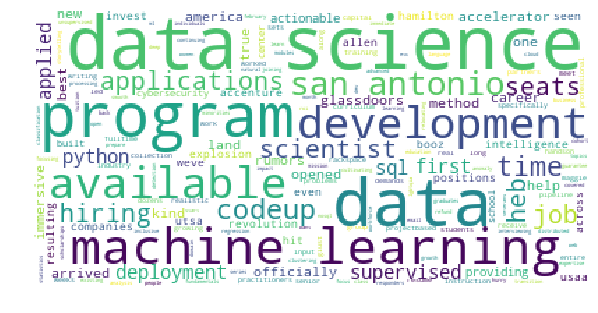

In [171]:
img = WordCloud(background_color='white').generate(blog_words)

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')

# Business News Articles

In [207]:
news_words = news.loc[:,'clean'][0:25]
news_words

0     world ' fourthrichest person warren buffett cl...
1     gujaratbased diamond trader savji dholakia ' k...
2     world ' fourthrichest person warren buffett sa...
3     us commerce secretary wilbur ross monday said ...
4     proxy advisory firm ingovern alleged britannia...
5     japanese billionaire yusaku maezawa chosen spa...
6     air india ' new york office transferred 300000...
7     indigo talks airbus add new planes including l...
8     activists hyderabad claimed infosys deducting ...
9     apple featured world ' fourthrichest person be...
10    china ' xiaomi released statement disputing es...
11    online travel website easemytrip reportedly en...
12    ecommerce conglomerate infibeam avenues ' boar...
13    pepsico india withdrew lawsuit two farmers guj...
14    world ' fourthrichest person warren buffett mo...
15    french telco orange ' exceo didier lombard alo...
16    air india decided not pursue plan take five bo...
17    infrastructure major larsen toubro lt mond

In [200]:
news_frequency = pd.Series(str(news_words).split()).value_counts(ascending=False).head(20)

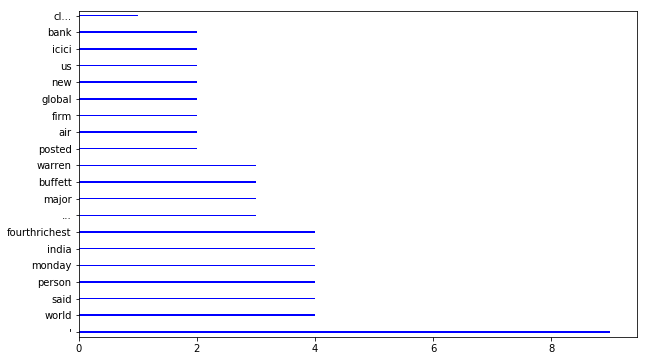

In [203]:
news_frequency.plot.barh(width=.09, color='blue', figsize=(10,6))

(-0.5, 399.5, 199.5, -0.5)

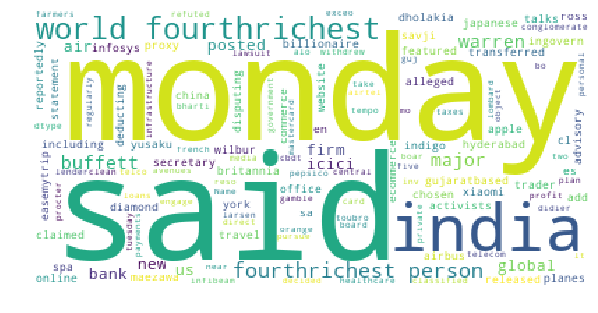

In [206]:
img = WordCloud(background_color='white').generate(str(news_words))

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')